In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

Импортировала все нужные библиотеки. Теперь надо скачать датасет

In [11]:
file='C:/Users/Мвидео/Downloads/analytics_test.csv'
dataset=pd.read_csv(file)
dataset

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
0,0,96422511,female,68,android,89656828,передачи о новых технологиях,show,share,6,playlist,0
1,1,45247030,male,62,android_tv,89784877,автопрому новости,news,search,0,NaN,0
2,2,79572413,male,12,web,10555855,логистическое законодательство,news,search,0,NaN,0
3,3,821317,female,58,android_tv,72054848,банковские премии новости,news,search,0,NaN,0
4,4,6206023,female,24,android,20838049,вики шоу аманда,show,subscribe,7,author,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,96140045,anonym,0,web,41018546,мем с грустным скрипачом,music,search,0,NaN,0
19996,19996,49729858,male,26,android,3409043,музыка из советских фильмов,music,like,12,clip,0
19997,19997,83070163,anonym,0,iphone,68120968,допрос шоу нурлан,show,search,0,NaN,0
19998,19998,23171813,female,23,android_tv,28022664,кстати шоу жу,show,search,0,NaN,0


Первым делом надо разобраться в каких случаях поиск выдает плохие результаты или вообще не выдает. Плохим можно считать результат в котором столбец view_time равен нулю или click_position тоже равен нулю ( получется, если я правильно поняла, при поиски алгоритм не выдал вообще никих результатов)

In [ ]:
нелувые_viem=dataset[dataset['view_time']!=0] #посмотрела строки, в которых view_time не равен нулю 
нелувые_viem 


,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
9,9,30126713,female,29,web,29645901,автозаконодательство новости,news,view,2,clip,183
34,34,46646403,male,37,smart_tv,63096541,лидерские технологии новости,news,view,16,video,6121
38,38,74175804,female,29,iphone,56167888,цифровой маркетинг новости,news,view,11,clip,1760
40,40,89440251,female,34,smart_tv,382796812,топ 10 самых кассовых фильмов,films,view,7,playlist,1763
53,53,46972894,female,63,android,99604594,большое шоу 11 сезон расширенная версия смотре...,show,view,7,playlist,739
...,...,...,...,...,...,...,...,...,...,...,...,...
19958,19958,20388010,anonym,0,android_tv,886878678,скрытые детали в фильмах Нолана,films,view,1,video,6103
19978,19978,14611332,female,34,web,87655911,как отличить джаз от блюза,music,view,16,clip,104
19981,19981,7334880,female,16,iphone,43689881,консалтинговое законодательство,news,view,1,clip,986
19985,19985,77464757,anonym,0,android_tv,155502390,где снимался Том Круз в 2024,films,view,0,clip,2983


In [39]:
нулевые_viem=dataset[dataset['view_time']==0]
нулевые_viem 

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
0,0,96422511,female,68,android,89656828,передачи о новых технологиях,show,share,6,playlist,0
1,1,45247030,male,62,android_tv,89784877,автопрому новости,news,search,0,NaN,0
2,2,79572413,male,12,web,10555855,логистическое законодательство,news,search,0,NaN,0
3,3,821317,female,58,android_tv,72054848,банковские премии новости,news,search,0,NaN,0
4,4,6206023,female,24,android,20838049,вики шоу аманда,show,subscribe,7,author,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,96140045,anonym,0,web,41018546,мем с грустным скрипачом,music,search,0,NaN,0
19996,19996,49729858,male,26,android,3409043,музыка из советских фильмов,music,like,12,clip,0
19997,19997,83070163,anonym,0,iphone,68120968,допрос шоу нурлан,show,search,0,NaN,0
19998,19998,23171813,female,23,android_tv,28022664,кстати шоу жу,show,search,0,NaN,0


Строк с нулевыми значениями 17083, а с ненулевыми 2917. Теперь мне надо узнать какой контент менее интересен или может это зависит от типа устройства.  

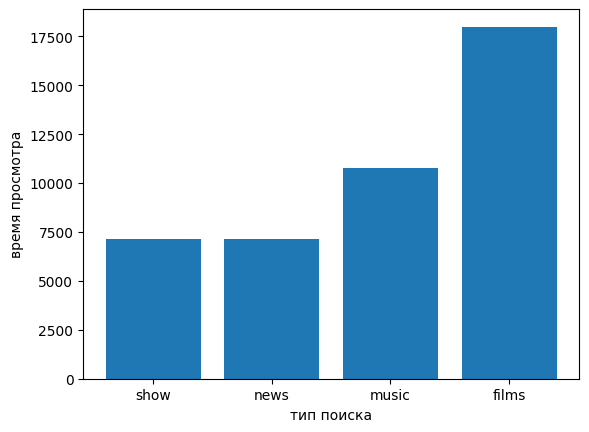

In [22]:
plt.Figure(figsize=(10,6))
plt.bar(dataset['query_type'], dataset['view_time'])
plt.xlabel("тип поиска")
plt.ylabel("время просмотра")
plt.show()


Посмотрев на график, понимаю, что фильмы пользователи смотрят  намного больше, чем другой контент. Теперь хочу узнать на какой платформе пользователи чаще всего смотрят фильмы. 

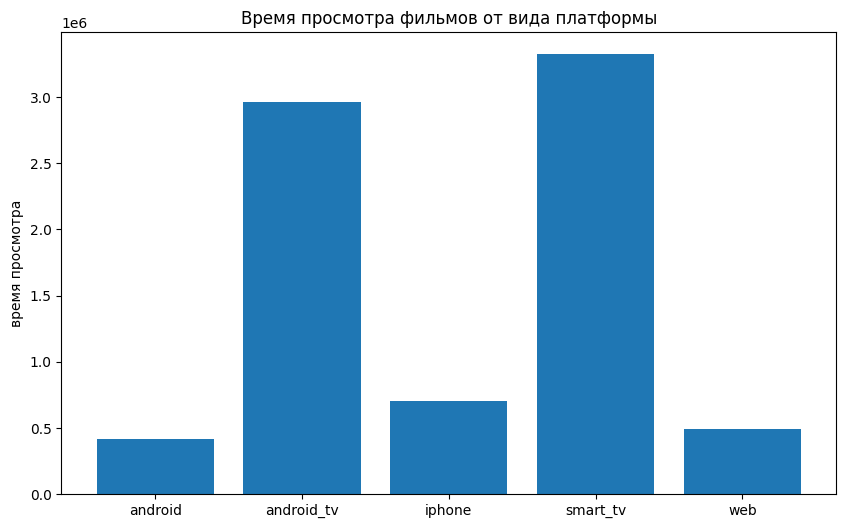

In [29]:
film=dataset[dataset['query_type']=='films']
new_film=film.groupby('platform')['view_time'].sum().reset_index() # сгруппировала фильмы по типу платформы 

plt.figure(figsize=(10,6))
plt.bar(new_film['platform'], new_film['view_time'])
plt.title("Время просмотра фильмов от вида платформы")
plt.ylabel("время просмотра")
plt.show()



Итак, можно прийти к выводу, что фильмы пользователи смотрят чаще всего и в особенности на таких платформах, как "android_tv" и "smart_tv". Менее активно смотрят на "android" и "wed"

Теперь хочу узнать, какие запросы пользователи задают активнее всего помимо фильмов. Проанализировав столбец, поняла, что есть некоторые ключевые слова, которые в основном повторяются почти в каждом запросе.Теперь я хочу узнать кол-во запросов на эти темы.

<Figure size 1000x600 with 0 Axes>

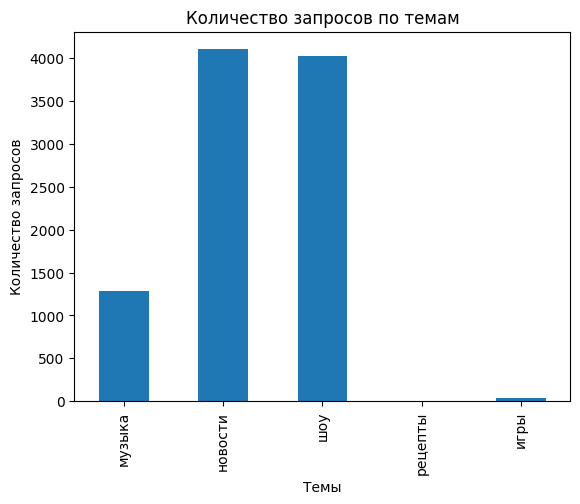

In [45]:
keywords = ['музыка', 'новости', 'шоу', 'рецепты', 'игры',]
counts = {i: 0 for i in keywords}

for i in keywords:
    counts[i] = dataset['query_text'].str.contains(i,case=False, na=False).sum()

counts_dt = pd.DataFrame(list(counts.items()), columns=['Тема', 'Количество'])

plt.figure(figsize=(10, 6))
counts_dt.plot(kind='bar', x='Тема', y='Количество', legend=False)

# Настройки графика
plt.title('Количество запросов по темам')
plt.xlabel('Темы')
plt.ylabel('Количество запросов')
plt.show()



Итак,после фильмом пользователи чаще всего смотрят новости. Менее всего интересны такие темы,как "игры" и "рецепты"